# Hass Consulting Company 

## 1. Defining the Question

### a) Specifying the Question

We aim to predict the price of houses given information on real estate propeties collected few months ago . 



### b) Defining the Metric for Success

Finding the prediction that has the smallest positive Mean squared error 

### c) Understanding the context 

Hass Consulting Company is a real estate company that has been leadong in its industry. It has over 25 years of experience in real estate. It was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.


### d) Recording the Experimental Design

For this experiment we will conduct the Exploratory Data Analysis method where we will : 


1.   Read the data - We will us the pandas library to read the csv files that we will be using 
2.   Check the dataset - We will be checking for the datatypes and the shape of the data  
1.   Externally Validate the dataset - We will validate our dataset with wikipedia  
2.   Tidy the dataset - We intend to detect outliers and anomalies, in addition to that we drop missing values and any other issues with the data. 
1.   Perform Exploratory analysis - We will perform univariate, bivariate and multivariate analysis and record our soloutions  
2.   Implement the soloution - We put our regression here that will help us build a model.  
1.   Challenge the soloution - We will change the hyperparameter tuning of the model to get different answers 












### e) Data Relevance

There are two datasets for this experiment. 
The first dataset has 21613 rows and 20columns  which are namely: 
> id, price, bedrooms, bathrooms, square feet living room , square feet parking lot, number of floors, waterfront, number of views, condition, grade, square feet above, square feet basement, year built, year renovated, zipcode, latitude, longitude, square feet living15, square feet parking lot15



## 2. Reading the Data

In [71]:
# Importing the neccessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [72]:
# Loading the Dataset 
#
df = pd.read_csv('Independent Project Week 7 - house_data.csv')

## 3. Checking the Data

In [73]:
# Determining the no. of records in our dataset
#
df.shape

(21613, 20)

In [74]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [75]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [76]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [77]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 6. Tidying the Dataset

In [78]:
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

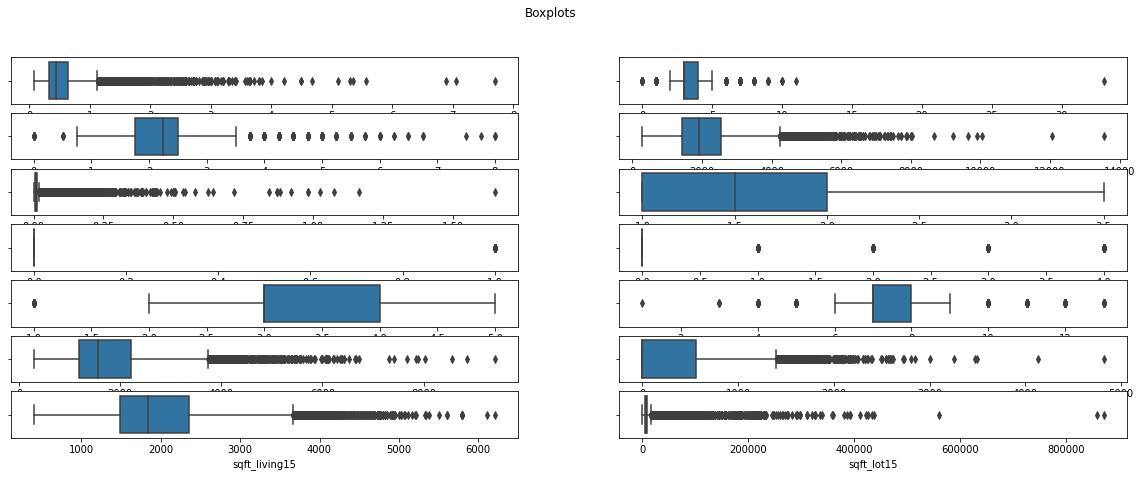

In [79]:
# Checking for Outliers
#
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14)) = plt.subplots(7,2, figsize=(20, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['price'], ax=ax1)
sns.boxplot(df['bedrooms'], ax=ax2)
sns.boxplot(df['bathrooms'], ax=ax3)
sns.boxplot(df['sqft_living'], ax=ax4)
sns.boxplot(df['sqft_lot'], ax=ax5)
sns.boxplot(df['floors'], ax=ax6)
sns.boxplot(df['waterfront'], ax=ax7)
sns.boxplot(df['view'], ax=ax8)
sns.boxplot(df['condition'], ax=ax9)
sns.boxplot(df['grade'], ax=ax10)
sns.boxplot(df['sqft_above'], ax=ax11)
sns.boxplot(df['sqft_basement'], ax=ax12)
sns.boxplot(df['sqft_living15'], ax=ax13)
sns.boxplot(df['sqft_lot15'], ax=ax14)
plt.show()

In [80]:
#Checking for anomalies
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(mask)

id                  0
price            1159
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2124
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      914
zipcode             0
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64


In [81]:
# Identifying the Missing Data
#
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [82]:
# Dealing with the Missing Data
#
df = df.dropna()

In [83]:
# More data cleaning procedures
#
df.drop(['id','lat','long'],axis=1,inplace=True)


In [84]:
df['yr_built'] = pd.to_datetime(df['yr_built'])
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

In [85]:
df.drop(['yr_built','yr_renovated'],axis=1,inplace=True)

In [86]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.6 MB


## 6. Exploratory Analysis

#### Univariate Analysis 

In [88]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062


<BarContainer object of 13 artists>

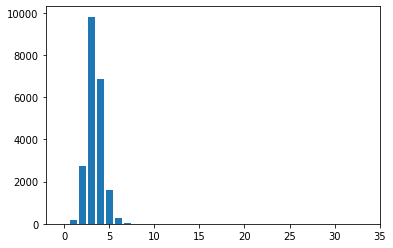

In [89]:
# Ploting the univariate summaries and recording our observations
#
rooms = df['bedrooms'].value_counts()
rooms
bedrooms = [3,4,2,5,6,1,7,8,0,9,10,11,33]
plt.bar(bedrooms,rooms)

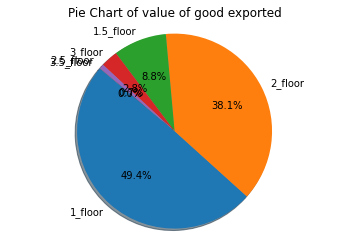

In [90]:
numm = df['floors'].value_counts()
numm
x = ['1_floor','2_floor','1.5_floor','3_floor','2.5_floor','3.5_floor']
plt.pie(numm, labels = x, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of value of good exported')
plt.show()

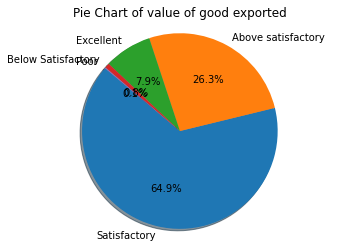

In [91]:
num = df['condition'].value_counts()
x = ['Satisfactory','Above satisfactory','Excellent','Below Satisfactory','Poor']
plt.pie(num, labels = x, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of value of good exported')
plt.show()

<BarContainer object of 12 artists>

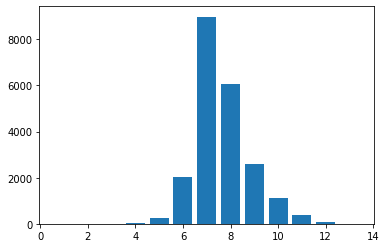

In [92]:
grade = df['grade'].value_counts()
grades = [7,8,9,6,10,11,5,12,4,13,3,1]
plt.bar(grades,grade)

## 7. Bivariate Analysis 

#### The first problem 

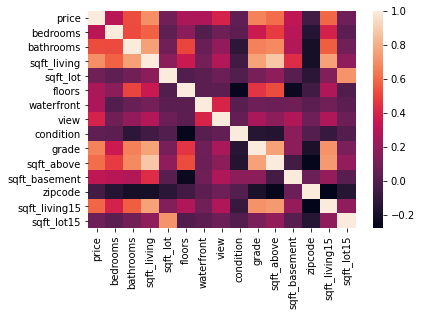

In [93]:
sns.heatmap(df.corr())

## Multivariate Analysis 

In [131]:
from sklearn.model_selection import train_test_split 
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [132]:
y.shape

(21613,)

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [98]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([3.44260497e-01, 1.24634357e-01, 1.21811379e-01, 9.27269509e-02,
       6.72094152e-02, 5.64224416e-02, 4.80732874e-02, 3.78125714e-02,
       3.56323758e-02, 1.95881151e-02, 1.86187636e-02, 1.71528061e-02,
       1.60570397e-02, 2.55533332e-33])

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [100]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.009484154522322461


## Implementing the soloution 

#### Linear Regression 

In [102]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))

Mean squared error: 52456744740.71
Variance score: 0.61


#### Quantile regression 

In [103]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062


In [104]:
Y = df.iloc[:,1:]
x = df.iloc[:,0]

In [105]:
import statsmodels.formula.api as smf
mod = smf.quantreg('sqft_living ~ price', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:            sqft_living   Pseudo R-squared:               0.2657
Model:                       QuantReg   Bandwidth:                       108.6
Method:                 Least Squares   Sparsity:                        1566.
Date:                Fri, 19 Feb 2021   No. Observations:                21613
Time:                        16:27:22   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1007.5015      9.474    106.346      0.000     988.932    1026.071
price          0.0019   1.45e-05    129.719      0.000       0.002       0.002

The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


In [106]:
# Preparation before plotting
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['price']] + \
            res.conf_int().loc['price'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'c', 'd'])

ols = smf.ols('sqft_living ~ price', df).fit()
ols_ci = ols.conf_int().loc['price'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['price'],
           c = ols_ci[0],
           d = ols_ci[1])

print(models)
print(ols)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


      q            a         b         c         d
0  0.05   390.285022  0.001274  0.001231  0.001318
1  0.15   669.808694  0.001398  0.001364  0.001432
2  0.25   764.419697  0.001569  0.001539  0.001599
3  0.35   818.192189  0.001741  0.001711  0.001771
4  0.45   949.772450  0.001840  0.001811  0.001868
5  0.55  1044.826883  0.001958  0.001930  0.001986
6  0.65  1119.835027  0.002137  0.002110  0.002165
7  0.75  1260.312500  0.002266  0.002239  0.002292
8  0.85  1382.925197  0.002489  0.002460  0.002517
9  0.95  1665.714287  0.002786  0.002742  0.002829
{'a': 1131.7845451652129, 'b': 0.0017551767966986565, 'c': 0.0017314382941559443, 'd': 0.0017789152992413687}


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


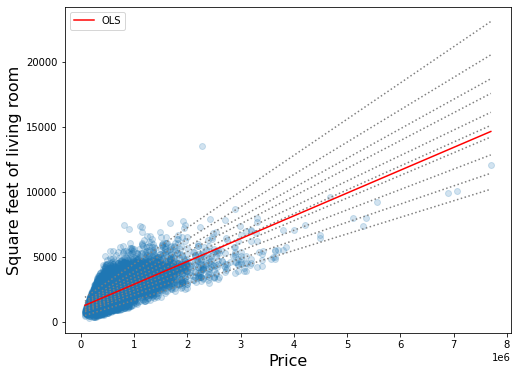

In [107]:
# First plot 
x = np.arange(df.price.min(), df.price.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(df.price, df.sqft_living, alpha=.2)
legend = ax.legend()
ax.set_xlabel('Price', fontsize=16)
ax.set_ylabel('Square feet of living room', fontsize=16);

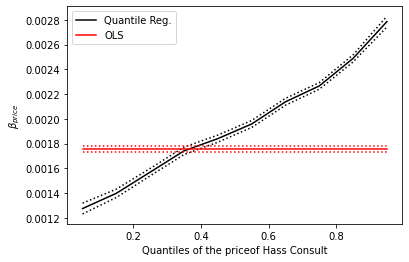

In [108]:
# Second plot 
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.c, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.d, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['c']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['d']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{price}$')
plt.xlabel('Quantiles of the priceof Hass Consult')
plt.legend()
plt.show()

#### Lasso Regression 

In [ ]:
from sklearn.model_selection import train_test_split 
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [109]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

In [110]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
y_pred = model.predict(X_test)

In [112]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
17384,297000.0,3.848020e+05
722,1580000.0,1.292395e+06
2680,562100.0,2.458460e+05
18754,631500.0,2.721707e+05
14554,780000.0,8.422551e+05
...,...,...
5427,844000.0,9.873462e+05
16547,335500.0,3.849001e+05
4585,369950.0,4.198426e+05
17762,300000.0,2.092789e+05


In [113]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 174747.13893920637
Mean Squared Error: 63417621086.59459
Root Mean Squared Error: 251828.55494680224


#### Ridge Regression 

In [ ]:
from sklearn.model_selection import train_test_split 
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [114]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

In [115]:
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
y_pred = model.predict(X_test)

In [117]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
17384,297000.0,3.848036e+05
722,1580000.0,1.292387e+06
2680,562100.0,2.458491e+05
18754,631500.0,2.721735e+05
14554,780000.0,8.422520e+05
...,...,...
5427,844000.0,9.873416e+05
16547,335500.0,3.849017e+05
4585,369950.0,4.198439e+05
17762,300000.0,2.092823e+05


In [118]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 174746.57397275305
Mean Squared Error: 63417549825.24095
Root Mean Squared Error: 251828.41345892832


#### Elastic net regression 

In [ ]:
from sklearn.model_selection import train_test_split 
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [119]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [120]:
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
y_pred = model.predict(X_test)

In [122]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
17384,297000.0,3.996610e+05
722,1580000.0,1.221949e+06
2680,562100.0,2.737656e+05
18754,631500.0,2.976160e+05
14554,780000.0,8.141179e+05
...,...,...
5427,844000.0,9.455719e+05
16547,335500.0,3.997499e+05
4585,369950.0,4.314082e+05
17762,300000.0,2.406354e+05


In [123]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 170434.11491459268
Mean Squared Error: 63317422376.89888
Root Mean Squared Error: 251629.5339917373


## Challenging the soloution 

#### Lasso Regression 

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

lasso = linear_model.Lasso() 


In [138]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

In [139]:
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [140]:
gridlasso.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310916520551436.06, tolerance: 178133856304.13672
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347859933045950.3, tolerance: 200601636410.69806
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331747879712042.75, tolerance: 186824072267.357
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348487343

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [142]:
y_pred = gridlasso.predict(X_test)

In [143]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 147233.6162385272
Mean Squared Error: 48024551966.38399
Root Mean Squared Error: 219145.04777973876


#### Ridge Regression 

In [124]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [133]:
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

In [134]:
model = Ridge(alpha=0.01)
model.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [135]:
y_pred = model.predict(X_test)

In [129]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 174747.2304575136
Mean Squared Error: 63417632631.38054
Root Mean Squared Error: 251828.57786871714


#### Elastic Net Regression 

In [144]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [146]:
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [147]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.75,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [149]:
y_pred = elastic.predict(X_test)

In [150]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 168453.96902620018
Mean Squared Error: 68746714315.50507
Root Mean Squared Error: 262195.94641318364


## 9. Follow up questions

### a). Did we have the right data?

No we didnt have the right data because our Mean squared error was very far from zero. 

### b). Do we need other data to answer our question?

No we do not need other data to answer our question 

### c). Did we have the right question?

Yes we had the right question because when we adjusted pur models we got better answers. 